# ML Beginner Project - Iris Data Set

In [27]:
# Working through tutorial: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [36]:
from __future__ import print_function, division
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# Peek at the data
print(dataset.shape)
print("----------------------------")
print(dataset.head(20))
print("----------------------------")
print(dataset.describe())

(150, 5)
----------------------------
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4         

In [8]:
# class disitribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


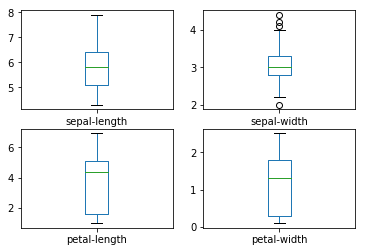

In [9]:
# boxplots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

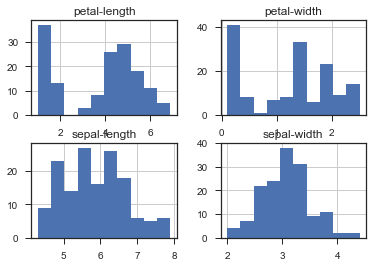

In [16]:
# univariate histograms
dataset.hist()
plt.show()

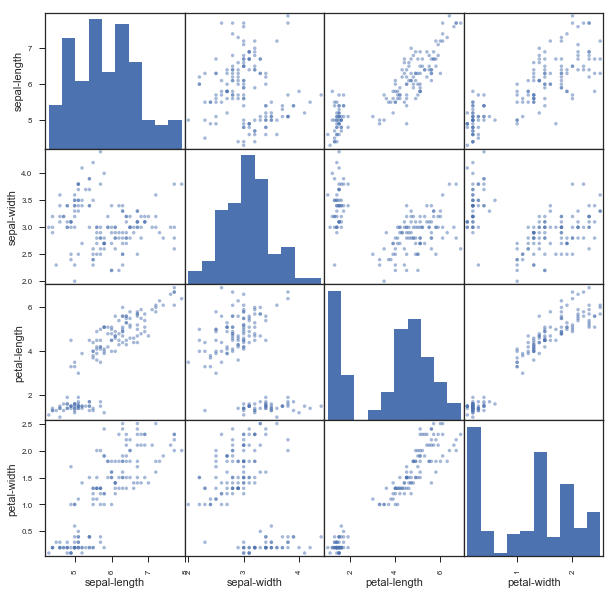

In [24]:
# multivariate plots
# scatter plot matrix 
scatter_matrix(dataset, figsize=(10,10))
plt.show()

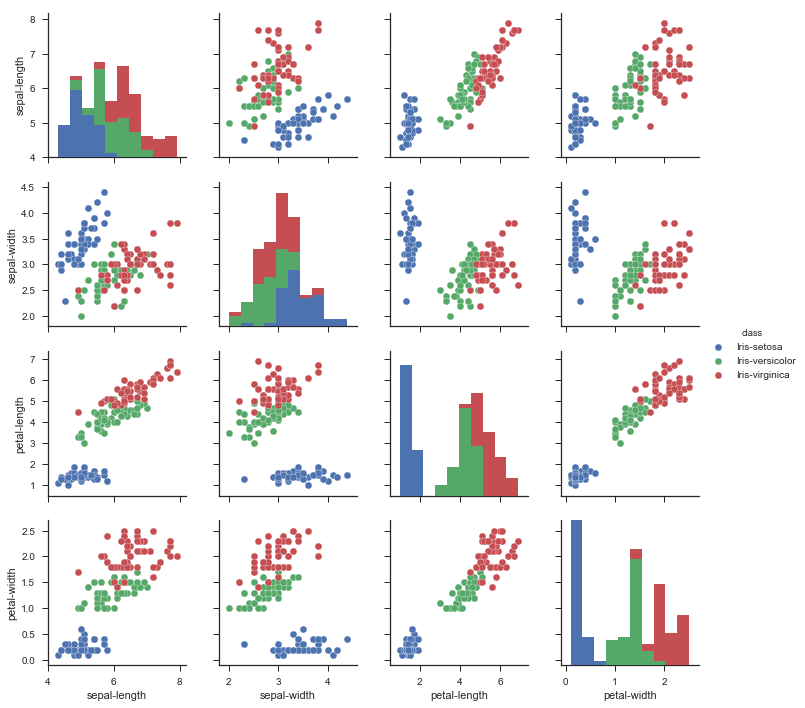

In [26]:
# doing it in seaborn as well
sns.pairplot(dataset, hue='class')

We now want to make a validation data set. We are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate best model is. Split loaded dataset into two, 80% of which we will use to train models, 20% we hold back as validation dataset

In [34]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [38]:
# Use 10-fold cross validation to estimate acuracy
## This splits dataset into 10 parts, train on 9 and test on 1 and repeat
# for all combinations of train-test splits
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# The metric 'accuracy' is being used to evaluate models. This is 
# ratio of number of correctly predicted instances in divided by
# the total number of instances in the dataset multiplied by 100
# to give percentage. Scoring variable when we run build and evaluate
# each model next.

In [39]:
# We will be evaluating five models: two linear, 2 nonlinear
# note: remember to reread wikipedia page on LR and LDA...helpful comparison to ANOVA
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [41]:
# Make Predictions
# KNN Algorithm was most accurate that we tested, now we want to get
## an idea of the accuracy of the model on our validation set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [42]:
help(classification_report)

Help on function classification_report in module sklearn.metrics.classification:

classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
    Build a text report showing the main classification metrics
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_labels]
        Optional list of label indices to include in the report.
    
    target_names : list of strings
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    digits : int
        Number of digits for formatting output floating point values
    
   